# Email Spam Classification

## Purpose
Classify email into spam and non spam using ML algorithms.

## Version Changes
First Draft

# Load Data

In [315]:
import numpy as np
import pandas as pd

In [316]:
!pwd

/Users/arvindyadav/Desktop/AmrataYadav/mlprojects/code/email_spam_classifier


In [317]:
train = pd.read_csv('./../../data/email_spam_classifier/train.csv', encoding='latin-1')

In [318]:
train.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1374,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA...",NaN,NaN,NaN
3971,ham,WOT U UP 2 J?,NaN,NaN,NaN
4253,ham,"How about clothes, jewelry, and trips?",NaN,NaN,NaN
2125,ham,"Sorry im getting up now, feel really bad- tota...",NaN,NaN,NaN
4098,ham,If u dun drive then how i go 2 sch.,NaN,NaN,NaN


In [319]:
train.shape

(5572, 5)

In [320]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# Data Cleaning

In [321]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [322]:
# drop last 3 cols
train.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [323]:
train.sample(5)

,v1,v2
2407,ham,Solve d Case : A Man Was Found Murdered On &l...
3006,ham,Ah you see. You have to be in the lingo. I wil...
3735,ham,Hows the street where the end of library walk is?
5337,ham,My birthday is on feb &lt;#&gt; da. .
4387,ham,"see you then, we're all christmassy here!"


In [324]:
# renaming the cols
train.rename(columns={'v1':'target','v2':'text'},inplace=True)
train.sample(5)

,target,text
2655,ham,Great! I have to run now so ttyl!
1994,ham,Have you been practising your curtsey?
128,ham,HEY GIRL. HOW R U? HOPE U R WELL ME AN DEL R B...
2130,ham,Later i guess. I needa do mcat study too.
5382,ham,"I can make it up there, squeezed &lt;#&gt; b..."


In [325]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [326]:
train['target'] = encoder.fit_transform(train['target'])

In [327]:
train.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [328]:
# missing values
train.isnull().sum()

target    0
text      0
dtype: int64

In [329]:
# check for duplicate values
train.duplicated().sum()

403

In [330]:
# remove duplicates
train = train.drop_duplicates(keep='first')

In [331]:
train.duplicated().sum()

0

In [332]:
train.shape

(5169, 2)

# EDA

In [333]:
train.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [334]:
train['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

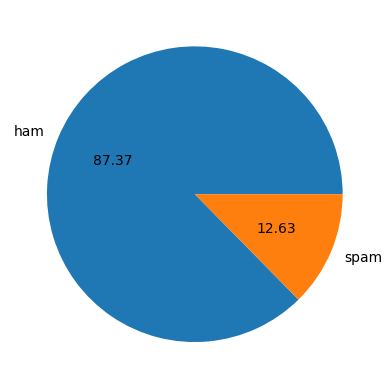

In [335]:
import matplotlib.pyplot as plt
plt.pie(train['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [336]:
# Data is imbalanced

In [337]:
# !pip install nltk

In [338]:
import nltk

In [339]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arvindyadav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [340]:
train['num_characters'] = train['text'].apply(len)

In [341]:
train.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [342]:
# num of words
train['num_words'] = train['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [343]:
train.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [344]:
train['num_sentences'] = train['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [345]:
train.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [346]:
train[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [347]:
# ham
train[train['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [348]:
#spam
train[train['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [349]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

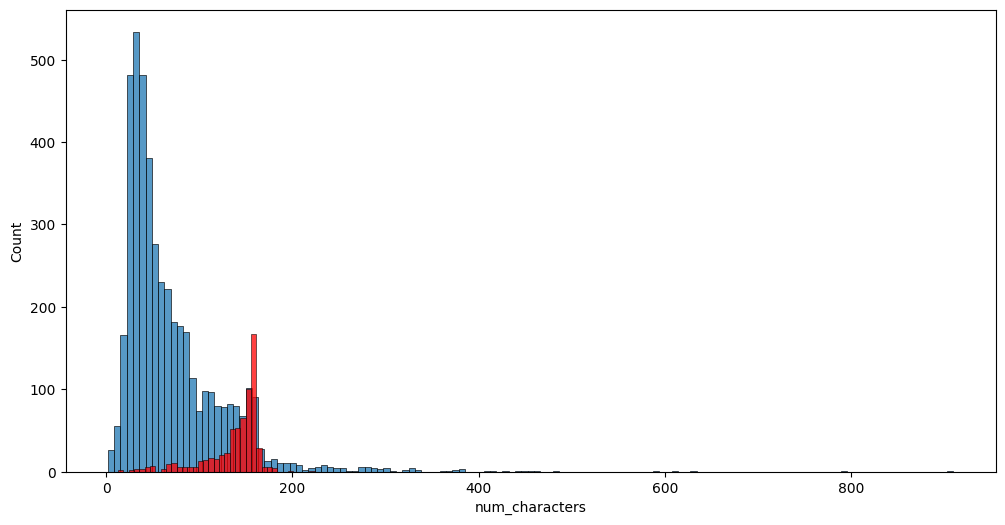

In [350]:
plt.figure(figsize=(12,6))
sns.histplot(train[train['target'] == 0]['num_characters'])
sns.histplot(train[train['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

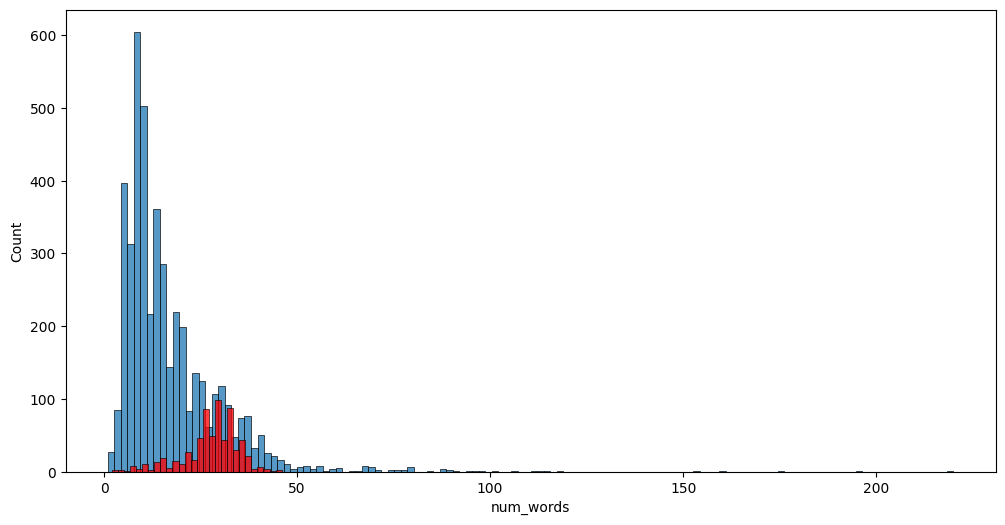

In [351]:
plt.figure(figsize=(12,6))
sns.histplot(train[train['target'] == 0]['num_words'])
sns.histplot(train[train['target'] == 1]['num_words'],color='red')

/Users/arvindyadav/miniconda3/envs/Amrata/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


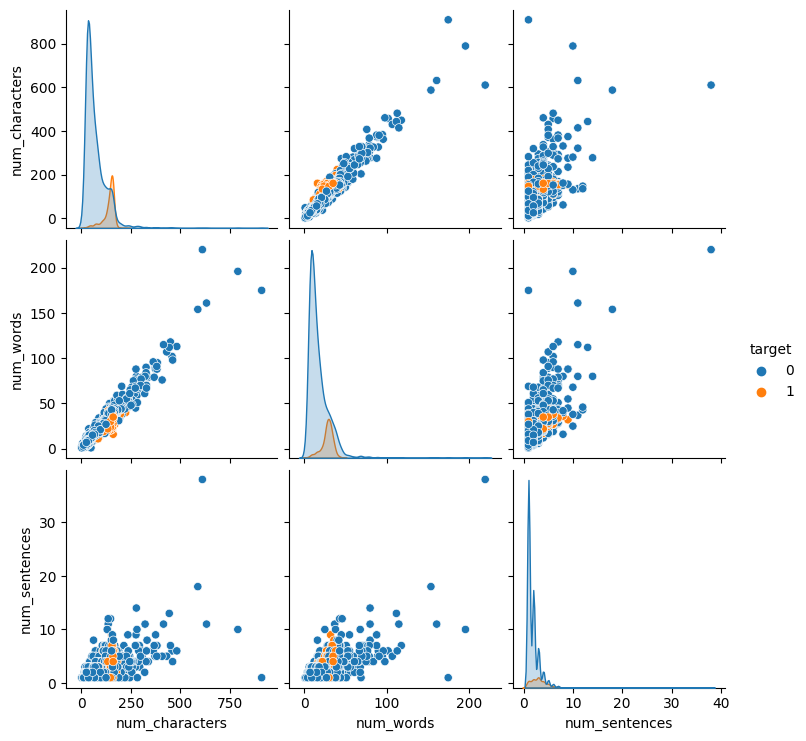

In [352]:
sns.pairplot(train,hue='target')

<Axes: >

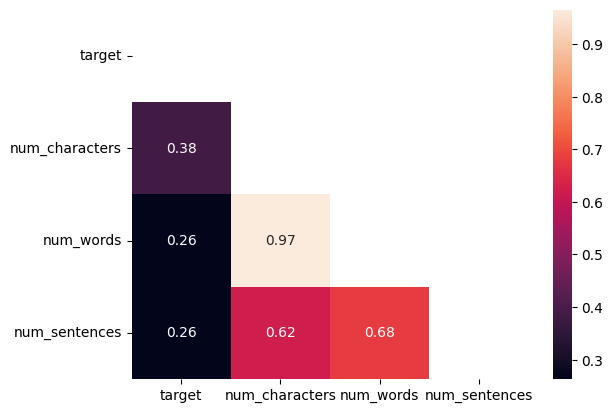

In [353]:
train_copy= train.drop(columns=['text'])
mask = np.triu(np.ones_like(train_copy.corr()))
sns.heatmap(train_copy.corr(),annot=True, mask=mask)

## Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [354]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arvindyadav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [355]:
from nltk.corpus import stopwords
stopwords.words('english')

import string


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [356]:
train['transformed_text'] = train['text'].apply(transform_text)

In [357]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [358]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [359]:
spam_wc = wc.generate(train[train['target'] == 1]['transformed_text'].str.cat(sep=" "))

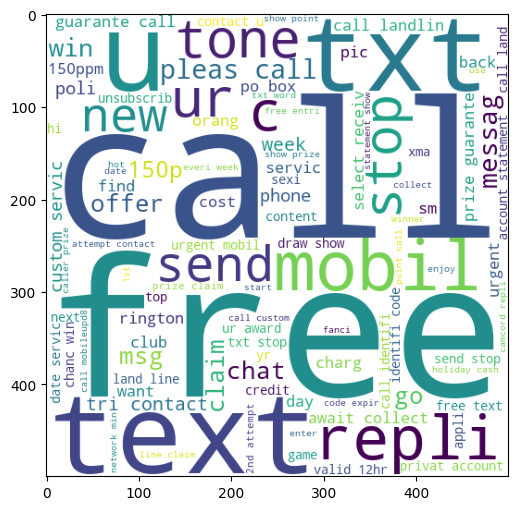

In [360]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [361]:
ham_wc = wc.generate(train[train['target'] == 0]['transformed_text'].str.cat(sep=" "))

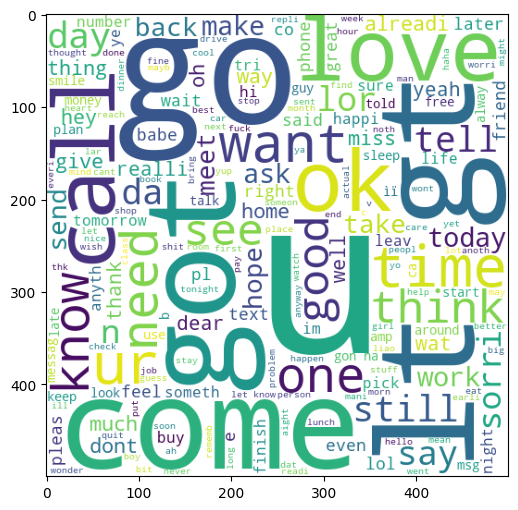

In [362]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [363]:
train.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [364]:
spam_corpus = []
for msg in train[train['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [365]:
len(spam_corpus)

9939

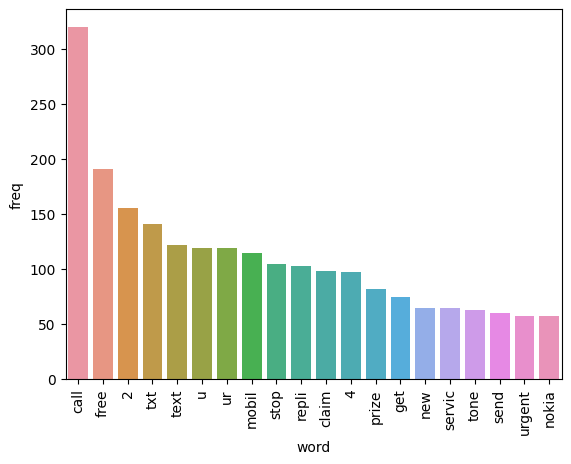

In [366]:
from collections import Counter

Counter(spam_corpus).most_common(10)
spam_collection = pd.DataFrame(Counter(spam_corpus).most_common(20))
spam_collection.columns =['word', 'freq']

sns.barplot(spam_collection, x='word', y='freq')
plt.xticks(rotation='vertical')
plt.show()

In [367]:
ham_corpus = []
for msg in train[train['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [368]:
len(ham_corpus)

35404

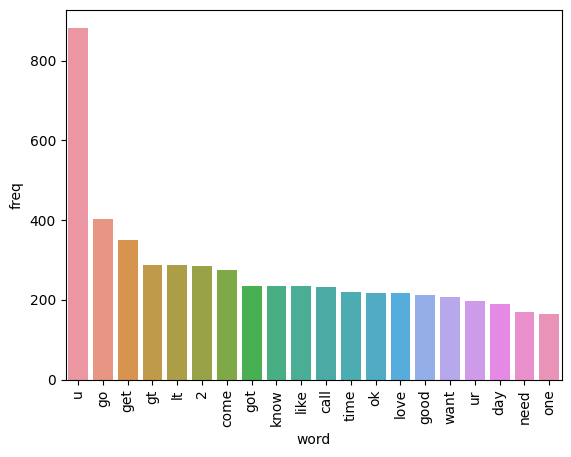

In [369]:
Counter(ham_corpus).most_common(10)
ham_collection = pd.DataFrame(Counter(ham_corpus).most_common(20))
ham_collection.columns =['word', 'freq']

sns.barplot(ham_collection, x='word', y='freq')
plt.xticks(rotation='vertical')
plt.show()

In [370]:
# Text Vectorization
# using Bag of Words
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 4. Model Building

In [391]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [392]:
X = tfidf.fit_transform(train['transformed_text']).toarray()

In [373]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [375]:
# #appending the num_character col to X
# X = np.hstack((X,train['num_characters'].values.reshape(-1,1)))

In [393]:
print(X.shape)

(5169, 3000)


In [394]:
y = train['target'].values

In [257]:
from sklearn.model_selection import train_test_split

In [395]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2023)

In [397]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [398]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [399]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8752417794970987
[[799 103]
 [ 26 106]]
0.507177033492823


In [400]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[902   0]
 [ 29 103]]
1.0


In [401]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9758220502901354
[[901   1]
 [ 24 108]]
0.9908256880733946


In [264]:
# tfidf --> MNB

In [305]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [296]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [297]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [279]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [379]:
train_classifier(svc,X_train,y_train,X_test,y_test)

/Users/arvindyadav/miniconda3/envs/Amrata/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8723404255319149, 0.0)

In [380]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/Users/arvindyadav/miniconda3/envs/Amrata/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8723404255319149
Precision -  0.0
For  KN
Accuracy -  0.9197292069632496
Precision -  0.7168141592920354
For  NB
Accuracy -  0.9361702127659575
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8837209302325582
For  LR
Accuracy -  0.9516441005802708
Precision -  0.8942307692307693
For  RF
Accuracy -  0.9690522243713733
Precision -  0.9901960784313726
For  AdaBoost
Accuracy -  0.9584139264990329
Precision -  0.9009009009009009
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8918918918918919
For  ETC
Accuracy -  0.9700193423597679
Precision -  0.963302752293578
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9270833333333334
For  xgb
Accuracy -  0.9622823984526112
Precision -  0.926605504587156


In [246]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [247]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.898453,1.000000
2,NB,0.952611,1.000000
8,ETC,0.968085,0.990099
5,RF,0.962282,0.989474
0,SVC,0.961315,0.960000
9,GBDT,0.946809,0.923077
10,xgb,0.960348,0.917431
4,LR,0.950677,0.909091
6,AdaBoost,0.957447,0.907407
7,BgC,0.949710,0.833333


In [248]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [249]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.898453
1,NB,Accuracy,0.952611
2,ETC,Accuracy,0.968085
3,RF,Accuracy,0.962282
4,SVC,Accuracy,0.961315
5,GBDT,Accuracy,0.946809
6,xgb,Accuracy,0.960348
7,LR,Accuracy,0.950677
8,AdaBoost,Accuracy,0.957447
9,BgC,Accuracy,0.949710


/Users/arvindyadav/miniconda3/envs/Amrata/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


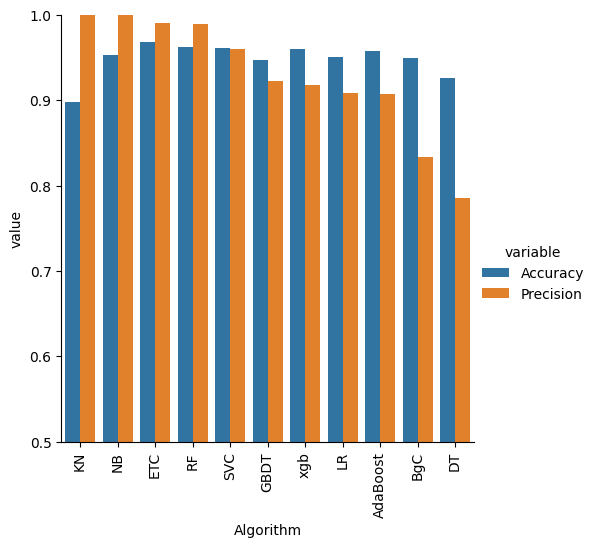

In [250]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [184]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [300]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [301]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [308]:
temp_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [309]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [381]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [382]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.898453,1.000000,0.908124,1.000000,0.899420,0.966667,0.919729,0.716814
1,NB,0.952611,1.000000,0.971954,1.000000,0.978723,0.974138,0.936170,1.000000
2,ETC,0.968085,0.990099,0.971954,0.990476,0.971954,0.990476,0.970019,0.963303
3,RF,0.962282,0.989474,0.965184,0.980000,0.965184,0.980000,0.969052,0.990196
4,SVC,0.961315,0.960000,0.967118,0.980392,0.959381,0.901786,0.872340,0.000000
5,GBDT,0.946809,0.923077,0.941006,0.890110,0.941006,0.890110,0.951644,0.927083
6,xgb,0.960348,0.917431,0.956480,0.922330,0.956480,0.922330,0.962282,0.926606
7,LR,0.950677,0.909091,0.952611,0.927835,0.957447,0.940000,0.951644,0.894231
8,AdaBoost,0.957447,0.907407,0.956480,0.891892,0.956480,0.891892,0.958414,0.900901
9,BgC,0.949710,0.833333,0.951644,0.836066,0.951644,0.836066,0.956480,0.891892


In [383]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [384]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [385]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [386]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9361702127659575
Precision 1.0


In [387]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [388]:
from sklearn.ensemble import StackingClassifier

In [389]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [390]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9700193423597679
Precision 0.8914728682170543


In [402]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [404]:
pickle.dump(transform_text,open('transform_text.pkl','wb'))